In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import h5py 
from mpl_toolkits.axes_grid.inset_locator import inset_axes

<ipython-input-2-134039f04646>:5: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


In [3]:
# load qiskit results for p=1 3-regular graph
filename = './data_pap/qiskit_p1_nd3.h5'
data = h5py.File(filename,'r')
time_qiskit = data['time_qiskit'][()]
num_nodes_list_qiskit = data['num_nodes_list'][()]

# load Qcover results by state vector method, for p=1, 3-regular graph
filename = './data_pap/stetevector_p1_nd3.h5'
data = h5py.File(filename,'r')
time_statevector = data['time_statevector'][()]
num_nodes0 = data['num_nodes_list'][()]

# load tensor networks results generated by Quimb, for p=1,3-regular graph
filename = './data_pap/Qcover_wtensor_p1_nd3.h5'
data = h5py.File(filename,'r')
time_tensor01 = data['time_tensor'][()]

filename = './data_pap/Qcover_decomp_tensor_p1_nd3.h5'
data = h5py.File(filename, 'r')
num_nodes12 = data['num_nodes_list'][:]
time_tensor12 = data['time_qcover_tensor'][:]

# load tensor networks results generated by Quimb, for p=2 3-regular graph
filename = './data_pap/Qcover_wtensor_p2_nd3.h5'
data = h5py.File(filename, 'r')
num_nodes21 = data['num_nodes_list'][:]
time_tensor21 = data['time_tensor'][:]

# The graph decomposition of tensor networks, p=2
filename = './data_pap/Qcover_decomp_tensor_p2_nd3.h5'
data = h5py.File(filename, 'r')
num_nodes22 = data['num_nodes_list'][:]
time_tensor22 = data['time_qcover_tensor'][:]

# The full-tensor networks, p=3, 3-regular graph
filename = './data_pap/Qcover_wtensor_p3_nd3.h5'
data = h5py.File(filename,'r')
num_nodes31 = data['num_nodes_list'][:]
time_tensor31 = data['time_tensor'][:]

# tensor networks approach by graph decomposition methods for p=3 3-regular graph
filename = './data_pap/Qcover_decomp_tensor_p3_nd3.h5'
data = h5py.File(filename, 'r')
num_nodes32 = data['num_nodes_list'][:]
time_tensor32 = data['time_qcover_tensor'][:]

# full-tensor networks for p=4,3-regular graph, the contract option here is 'greed-rf'
filename = './data_pap/Qcover_wtensor_p4_nd3.h5'
data = h5py.File(filename,'r')
num_nodes41 = data['num_nodes_list'][:]
time_tensor41 = data['time_tensor'][:]

# tensor networks approach by graph decomposition methods for 3-regular graph,
# the contract option here is 'greed-rf'
filename = './data_pap/Qcover_decomp_tensor_p4_nd3.h5'
data = h5py.File(filename, 'r')
num_nodes42 = data['num_nodes_list'][:]
time_tensor42 = data['time_qcover_tensor'][:]

#  full-tensor networks for p=1, sk problem
filename = './data_pap/sk_wtensor_p1.h5'
data = h5py.File(filename,'r')
num_nodes_sk1 = data['num_nodes_list'][:]
time_tensor_sk1 = data['time_tensor'][:]

# tensor networks approach by graph decomposition methods for sk problem, the contract option here is 'greed-rf'
filename = './data_pap/sk_decomp_tensor_p1.h5'
data = h5py.File(filename,'r')
num_nodes_sk2 = data['num_nodes_list'][:]
time_tensor_sk2 = data['time_qcover_tensor'][:]

# tensor networks approach by graph decomposition methods for sk problem, the contract option here is 'greed-rf'


filename = './data_pap/graphcolor_decomp_tensor_p1_nd3_cln3.h5'
data = h5py.File(filename, 'r')
num_nodes_gc2 = data['num_nodes_list'][:]
time_tensor_gc2 = data['time_qcover_tensor'][:]

filename = './data_pap/graphcolor_wtensor_p1_nd3_cln3.h5'
data = h5py.File(filename, 'r')
num_nodes_gc1 = data['num_nodes_list'][:]
time_tensor_gc1 = data['time_tensor'][:]


<ipython-input-7-80d9db31af5d>:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


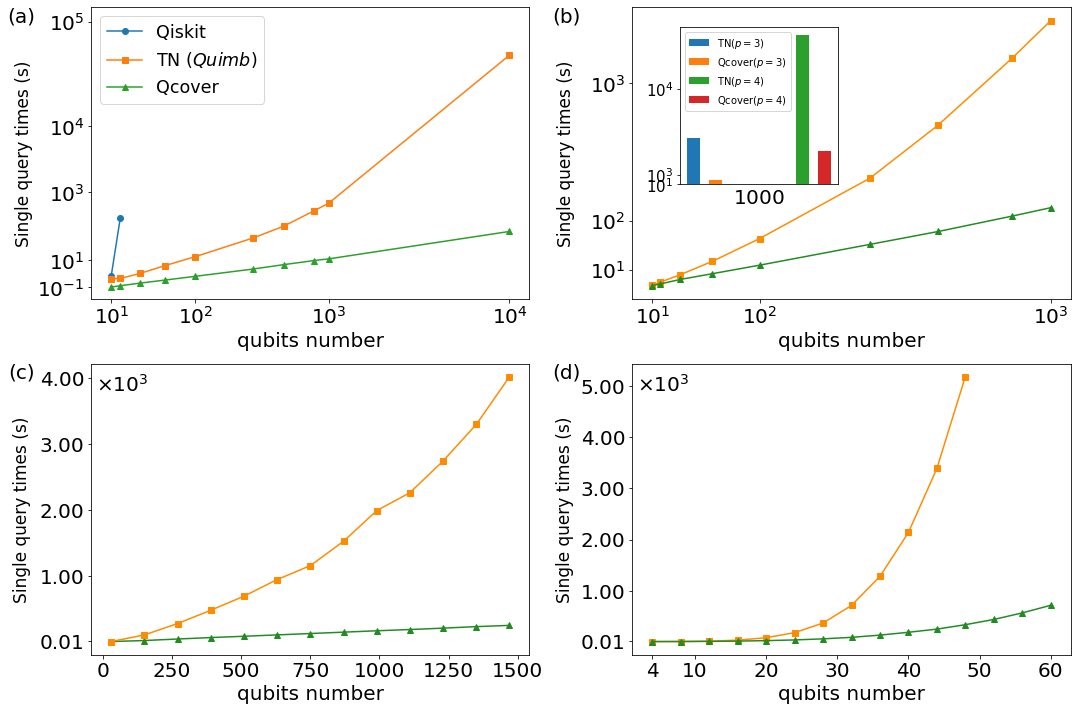

In [7]:
fts = 20
matplotlib.rc(['xtick','ytick'],labelsize=fts)
fig, ax = plt.subplots(2,2, figsize = (15,10))
ax = ax.ravel()

power1 = 1.9
power2 = 0.2
time_qiskit_new = np.power(time_qiskit,power2)
time_statevector_new = np.power(time_statevector,power2)
time_tensor_new = np.power(time_tensor01,power2)

ax[0].plot( np.log10(num_nodes_list_qiskit)**power1, time_qiskit_new,'o-',label ='Qiskit')
ax[0].plot(np.log10(num_nodes0) **power1 ,time_tensor_new,'s-', label = r'TN (${\it Quimb}$)')
ax[0].plot(np.log10(num_nodes0) **power1, time_statevector_new ,'-^',label = 'Qcover')

ax[0].set_xticks(np.array([1,2,3,4]) ** power1)
ax[0].set_xticklabels([r'$10^1$',r'$10^2$',r'$10^3$',r'$10^4$'])
ax[0].set_yticks(np.power(np.array([0.1,10,1000,10000,100000]),power2))
ax[0].set_ylim([0.1**power2-0.4,100000**power2+0.5])
ax[0].set_yticklabels([r'$10^{-1}$',r'$10^1$',r'$10^3$',r'$10^4$',r'$10^5$'])
ax[0].legend(fontsize= fts-2.5)
ax[0].set_xlabel('qubits number', fontsize = fts)

power1 = 3.0
power2 = 0.45
ax[1].plot(np.power(np.log10(num_nodes21), power1), time_tensor21**power2,'s-',color='darkorange')
ax[1].plot(np.power(np.log10(num_nodes22),power1),time_tensor22**power2,'^-',color='forestgreen')
ax[1].set_xticks(np.array([1,2,3])**power1)
ax[1].set_xticklabels([r'$10^1$',r'$10^2$',r'$10^3$'])
ax[1].set_xlabel(r'qubits number',fontsize = fts)
ax[1].set_yticks(np.power(np.array([10,100,1000]),power2))
ax[1].set_yticklabels([r'$10^1$',r'$10^2$',r'$10^3$'])

inset_ax = inset_axes(ax[1],height="30%",
                      width="30%", 
                      bbox_to_anchor=(-0.72,-0.85,1.2,1.8), bbox_transform=ax[1].transAxes)
X1 = np.array([3,4])
X2 = X1+0.2
Y1 = np.array([time_tensor32[-1],time_tensor42[-1]])
Y2 = np.array([time_tensor31[-1], time_tensor41[-1]])

inset_ax.bar(X1[0],Y2[0],width=0.12,label = r'TN($p = 3$)')

inset_ax.bar(X2[0],Y1[0],width=0.12,label = r'Qcover($p = 3$)')
inset_ax.bar(X1[1],Y2[1],width=0.12,label = r'TN($p =4$)')
inset_ax.bar(X2[1],Y1[1],width=0.12, label = r'Qcover($p = 4$)')
inset_ax.set_yticks([10, 1000, 10000])
inset_ax.set_yticklabels([r'$10^1$',r'$10^3$',r'$10^4$'],fontsize = fts-5)
inset_ax.set_xticks([])
inset_ax.set_xlabel(r'$1000$', fontsize = fts )
inset_ax.legend()


ax[3].plot(num_nodes_sk1, time_tensor_sk1/1000,'s-',color='darkorange')
ax[3].plot(num_nodes_sk2, time_tensor_sk2/1000,'^-',color='forestgreen')
ax[3].text(0.07, 0.93, r'$\times 10^{3}$', horizontalalignment='center',
     verticalalignment='center', transform=ax[3].transAxes,fontsize = fts)
ax[3].set_xticks([4,10,20,30,40,50,60])



times = 1000
ax[1].set_ylabel('Single query times (s)', fontsize = fts-3 ,labelpad = 7)
num_nodes_gc2_new, num_nodes_gc1_new = num_nodes_gc2 * 3, num_nodes_gc1 * 3
ax[2].plot(num_nodes_gc2_new, time_tensor_gc2/1000,'^-',color='forestgreen')
ax[2].plot(num_nodes_gc1_new, time_tensor_gc1/1000, 's-', color='darkorange')
ax[2].text(0.07, 0.93, r'$\times 10^{3}$', horizontalalignment='center',
     verticalalignment='center', transform=ax[2].transAxes,fontsize = fts)
ax[2].set_yticks([0.01, 1,2,3,4])
# ax[2].set_ylabel([r'$1$', r'$10$',r'$20$',r'$30$',r'$40$'])
# ax[2].set_xticks([30, 250,500,750,1000,1250,1500])


ax[0].set_ylabel('Single query times (s)', fontsize = fts-3)
ax[1].set_ylabel('Single query times (s)', fontsize = fts-3,labelpad = 15)
ax[2].set_ylabel('Single query times (s)', fontsize = fts-3, labelpad = 9)
ax[2].set_xlabel('qubits number', fontsize = fts)
ax[3].set_xlabel('qubits number', fontsize = fts)
ax[3].set_yticks([0.01, 1,2,3,4,5])
ax[3].set_ylabel([r'$10^-1$', r'$1$',r'$2$',r'$3$',r'$4$',r'$5$'])



ax[0].text(-0.16, 0.97, '(a)', horizontalalignment='center',
     verticalalignment='center', transform=ax[0].transAxes,fontsize = fts)
ax[1].text(-0.15, 0.97, '(b)', horizontalalignment='center',
     verticalalignment='center', transform=ax[1].transAxes,fontsize = fts)
ax[2].text(-0.16, 0.97, '(c)', horizontalalignment='center',
     verticalalignment='center', transform=ax[2].transAxes,fontsize = fts)
ax[3].text(-0.15, 0.97, '(d)', horizontalalignment='center',
     verticalalignment='center', transform=ax[3].transAxes,fontsize = fts)
ax[3].set_ylabel('Single query times (s)', fontsize = fts-3, labelpad = 7)
plt.tight_layout()
plt.savefig('paper_fig.pdf')